In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个图

In [26]:
#共有四种图可以使用，
g = nx.MultiDiGraph()
#g = nx.Graph(date="10.11",name="有向图") 传入字典键值对，直接构建出字典

In [29]:
#图就是一个字典
g.__dict__

{'edge_key_dict_factory': dict,
 'graph_attr_dict_factory': dict,
 'node_dict_factory': dict,
 'node_attr_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {'name': 'test', 'time': 2017},
 '_node': {},
 '_adj': {},
 '_pred': {},
 '_succ': {}}

In [28]:
#图属性，可以向图中键入任何数据
g.graph['name']='test'
g.graph['time']=2017


In [30]:
#查看图属性，并没有
g.graph

{'name': 'test', 'time': 2017}

In [31]:
#用字典的方法处理
g.graph.pop('name')

'test'

In [32]:
for a in g.graph:
    g.graph[a]='b'
    print(g.graph[a])

b


In [33]:
g.__dict__

{'edge_key_dict_factory': dict,
 'graph_attr_dict_factory': dict,
 'node_dict_factory': dict,
 'node_attr_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {'time': 'b'},
 '_node': {},
 '_adj': {},
 '_pred': {},
 '_succ': {}}

# 节点

In [35]:
#添加节点，他们全是key，值也是一个字典
g.add_node('a',test=5)
g.add_node('b',a=7,b=8,d='s')
g.add_node('c',a='b')
g.add_node('d')

In [36]:
g.__dict__

{'edge_key_dict_factory': dict,
 'graph_attr_dict_factory': dict,
 'node_dict_factory': dict,
 'node_attr_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {'time': 'b'},
 '_node': {'a': {'test': 5},
  'b': {'a': 7, 'b': 8, 'd': 's'},
  'c': {'a': 'b'},
  'd': {}},
 '_adj': {'a': {}, 'b': {}, 'c': {}, 'd': {}},
 '_pred': {'a': {}, 'b': {}, 'c': {}, 'd': {}},
 '_succ': {'a': {}, 'b': {}, 'c': {}, 'd': {}}}

In [41]:
#查看所有的节点
#nodes是一个字典，每个node都是字典键值，其attr是值，也是一个字典
g.nodes

NodeView(('a', 'b', 'c', 'd'))

In [42]:
#选中单个节点，也是用名字来选定
g.nodes['a']

{'test': 5}

In [47]:
#直接选中后就可以对node的attr进行修改，
g.nodes['a']['test']=6699
g.nodes['a']['fff']=1

In [48]:
g.nodes['a']

{'test': 6699, 'fff': 1}

In [50]:
#给定节点的数据，节点属性,只能用add_node添加节点，不能当字典初始化
g.add_node(1,index='test')

g.add_nodes_from([2,3], index='2/3th')

#g.add_node(object) 直接创建一个以object为键值的节点

In [51]:
#删除，也是使用字典的方法
g.nodes['a'].pop('test')

6699

In [52]:
#删除节点
g.remove_node('a')

In [53]:
print(g.nodes(data=True))
#每个节点有自己的字典数据

[('b', {'a': 7, 'b': 8, 'd': 's'}), ('c', {'a': 'b'}), ('d', {}), (1, {'index': 'test'}), (2, {'index': '2/3th'}), (3, {'index': '2/3th'})]


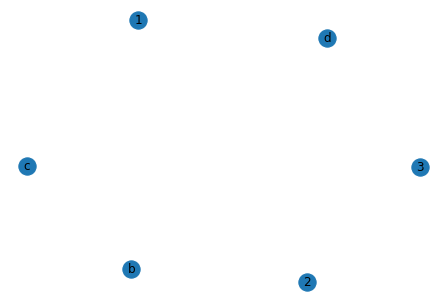

In [54]:
nx.draw(g,with_labels=True)

In [56]:
list(nx.topological_sort(g))

[3, 2, 1, 'd', 'c', 'b']

# 边

In [59]:
g.__dict__

{'edge_key_dict_factory': dict,
 'graph_attr_dict_factory': dict,
 'node_dict_factory': dict,
 'node_attr_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {'time': 'b'},
 '_node': {'d': {}, 'a': {}, 'z': {}, 'h': {}},
 '_adj': {'d': {}, 'a': {}, 'z': {'h': {0: {}}}, 'h': {}},
 '_pred': {'d': {}, 'a': {}, 'z': {}, 'h': {'z': {0: {}}}},
 '_succ': {'d': {}, 'a': {}, 'z': {'h': {0: {}}}, 'h': {}},
 'nodes': NodeView(('d', 'a', 'z', 'h'))}

In [60]:
#给两个节点创建一个边，从a到b,边是可以重复的
#没有节点会去创建一个，保证一定生成边
g.add_edge('a','b')
g.add_edge('z','h')
#返回的是该条边已经创建了几次

1

In [61]:
g.__dict__

{'edge_key_dict_factory': dict,
 'graph_attr_dict_factory': dict,
 'node_dict_factory': dict,
 'node_attr_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {'time': 'b'},
 '_node': {'d': {}, 'a': {}, 'z': {}, 'h': {}, 'b': {}},
 '_adj': {'d': {},
  'a': {'b': {0: {}}},
  'z': {'h': {0: {}, 1: {}}},
  'h': {},
  'b': {}},
 '_pred': {'d': {},
  'a': {},
  'z': {},
  'h': {'z': {0: {}, 1: {}}},
  'b': {'a': {0: {}}}},
 '_succ': {'d': {},
  'a': {'b': {0: {}}},
  'z': {'h': {0: {}, 1: {}}},
  'h': {},
  'b': {}},
 'nodes': NodeView(('d', 'a', 'z', 'h', 'b'))}

In [62]:
#删除边
g.remove_edge('a','b')


In [63]:
#边的属性
g.add_edge(1,2,weight=10)                    #在添加边时分配属性
print(g.edges(data=True))

[('z', 'h', {}), ('z', 'h', {}), (1, 2, {'weight': 10})]


In [64]:
#所有的边，这样遍历的话，就是用(u,v,key)
list(g.edges)

[('z', 'h', 0), ('z', 'h', 1), (1, 2, 0)]

In [65]:
#选中一条边,一定要给起始点，而不是终点
#但是只有边，没有数据
g.edges(1)

OutMultiEdgeDataView([(1, 2)])

In [28]:
#获得边的attr，要指定好边的起点和终点，一条边就要用[0]
print(g.get_edge_data(1,2)[0]['weight'])
print(g.get_edge_data(1,2)[0])
print(g.get_edge_data(1,2))

10
{'weight': 10}
{0: {'weight': 10}}


In [66]:
#从1到2的边attr,比上面方法更简单
g[1][2][0]

{'weight': 10}

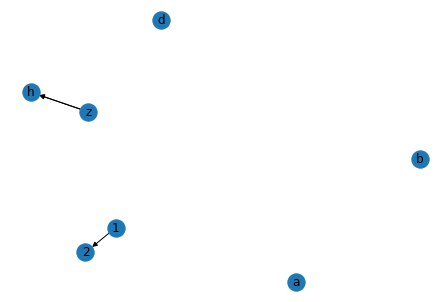

In [67]:
#画出整个图
nx.draw(g,with_labels=True)

In [69]:
class Node:
    def __init__(self):
        pass

In [70]:
a=Node()

In [71]:
g.add_node(a)

In [72]:
g.remove_edge('a','b')

NetworkXError: The edge a-b is not in the graph.

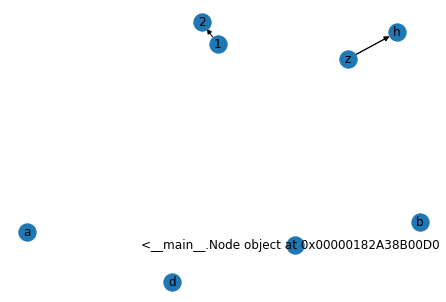

In [73]:
nx.draw(g,with_labels=True)

In [76]:
#in_edges和out_edges要给定节点的索引，
#是用来区分一个节点，输入的边和输出的边
list(g.in_edges(2,data=True))
#生成的这个list就可以使用u,v,key进行遍历

[(1, 2, {'weight': 10})]